# Galaxy Map
## Mapping planets with data visualisation tools

![image](galaxy_map.webp)  
Picture source: https://starwars.fandom.com/wiki/Map_to_Skywalker

### Table of contents:
1. Introduction
2. Goal
3. Galaxy map  
   3.1. Regions  
   3.2. Affiliation  
   3.3. Trade routes  
4. Summary

## 1. Introduction

While I was working on my <a href="https://github.com/twerhun/DataAnalysis_Planets/blob/master/Planets_Part1.ipynb">Planet Data Analysis Project</a> I created a data set containing all kinds of information about planets from Star Wars universe, scraped directly from <a href="https://starwars.fandom.com/wiki/Main_Page">wookieepedia site</a> (Star Wars wiki). For the purpose of that project I only used and analysed the data concerning orbital period, rotation period and planet diameter - the goal was to find the most similar real life exoplanet to the chosen Star Wars planet, so I had to find those data values that are common for both sets.

The information I gathered about Star Wars planets set is much more extensive.

This is why I decided to look closely at the other aspects that I managed to upload to my data set, especially at the positional data, that happen to be present there as well. On their basis I want to create a **Galaxy Map**, on which I wish to show other key aspects concerning Star Wars planets.

This is also a next step in my quest to constantly improve my data analysis and data visualisation skills. Today I extended my toolset by **seaborn dictionary** (for creating scatterplots) and **re dictionary** (here for effective double splitting strings).

## 2. Goal

The ultimate goal of this project is to create **Star Wars Galaxy Map** based on **Coordinates** data contained in already existing Star Wars Planets csv dataset. While doing so I will additionaly present other vital information that can be included in our map:

- **Regions**  
Since Star Wars planets are divided into various regions I want to present this data sorted by amount of planets. After that I will create a dataset that will be basis to the galaxy map scatterplot and then present key regions on plotted map.

- **Affiliation**  
The king is dead - long live the king. There were many reigns, empires, democracies, crime syndicates and other vicious, wise or forgettable rulers throughout the enitre Star Wars history. Similar to regions - I will show which faction ruled over the largest number of planets. I will then present the planet map of 6 most popular factions.

- **Routes**  
For planets to develop and rise, there had to be some kind of interplanetary contact, providing knowledge and goods exchange. Throughout the Star Wars history there were many established trade routes, connecting various planets. We will take a closer look at the most popular ones, and try to present them on the map.

Those 3 presentations will conclude my project, proving that there are many interesting ways to present data contained in Star Wars dataset, besides static quantitive analysis.

## 3.1. Regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import re
%matplotlib inline

As mentioned in the Introduction chapter, we will use already scraped and saved data about Star Wars Planets.

In [2]:
swPlanets = pd.read_csv('./StarWarsPlanets.csv', index_col=0).dropna(axis=0, how='all').fillna('')
swPlanets.head()

,affiliation,interest,region,system,routes,class,atmosphere,terrain,population,sector,...,species,coord,moons,language,flora,lengthday,lengthyear,imports,distance,position
5251977,Alliance to Restore the Republic,,,,,,,,,,...,,,,,,,,,,
Aargonar,Confederacy of Independent Systems,Aargonar Separatist base,,,,,,,,,...,,,,,,,,,,
Ab Dalis,Alliance to Restore the Republic,"Keftia district, Rendezvous Point Lambda-Four",Outer Rim Territories,Ab Dalis system,A hyperlane,Terrestrial,Breathable,Swamps,Over twenty million,,...,,,,,,,,,,
Abafar,Unallied (Separatist presence),"Rhydonium mining installation, The Void",Outer Rim Territories,Abafar system,,,Breathable,Desert,,Sprizen sector,...,,,,,,,,,,
Abednedo (planet),"Galactic Empire, New Republic",Oddy's home,Colonies,,Corellian Run,,,,,,...,Abednedo,,,,,,,,,


The important thing that we should take into consideration before we jump any further in our analysis is that data presented in this table is implemented as **strings**. For multiple elements in one category (for example affiliation), every faction is written down in one single string, **divided by coma or semicolon**.

During our analysis we will need to extract single elements with the exact precision, so I don't really want to use methods looking for part of the string. And, with all my Star Wars lore knowledge, even I can't list every single faction that existed in Star Wars universe. The most precise thing to do in this case is to **split** all those strings into single elements and save them as **lists of elements**. Based on that list I will be able to make lists of unique values and to quantify them.

This is why we will start with creating function that will **convert strings to list of elements** (splitting them by coma and semicolon and excluding data contained in the brackets - they contain either more detailed or irrelevant information from the perspective of this analysis - we won't be needing either of those information).

After funcion is complete, we will use it on entire data stored in swPlanets dataframe.

In [3]:
#splitting strings (if present) by desired characters and writing them down as lists of elements
def list_elements(data):
    return [i.split('(')[0].strip() for i in re.split(',|;', data)
            if i.split('(')[0].strip()!=''] if data!='' else data

In [4]:
swPlanets = swPlanets.applymap(list_elements)

The next important step to make is to create a function, that will **extract data** stored in desired dataframe (unwrap our created lists), returning **list of unique elements** and **their count**. This is the most vital function of this analysis, that I will use throughout all the subsections of this chapter.

In [5]:
def sort_by_val(dataframe, column):
    factor = []
    #listing unique elements
    for i in dataframe[column]:
        for j in i:
            if j.lower() not in [k.lower() for k in factor] and j!='':
                factor.append(j)
    factNumber = []
    #listing number of representations of elements 
    for i in factor:
        val=0
        for j in dataframe[column]:
            if i in j:
                val+=1
        factNumber.append(val)
    return [factor, factNumber]

With this function prepared, let's extract data concerning planets **Region** and present them on a horizontal bar chart.

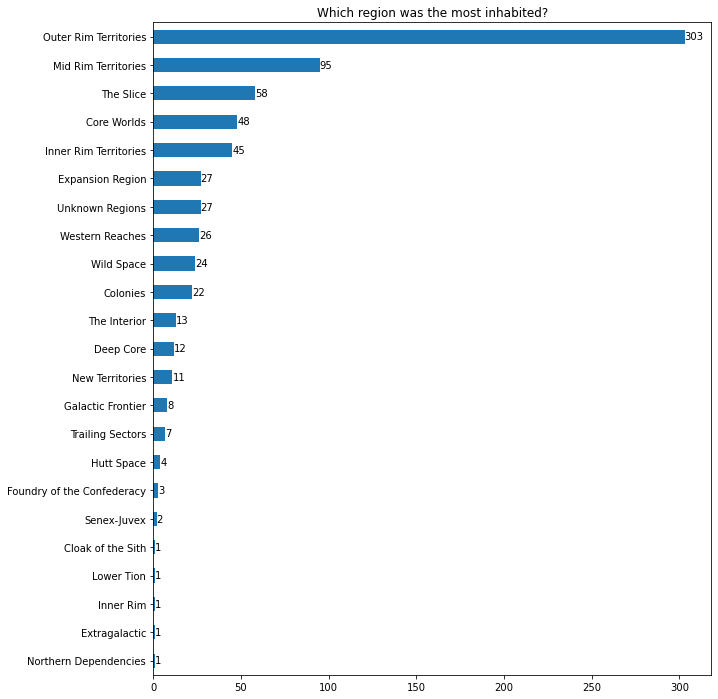

In [6]:
regionData = pd.Series(index=sort_by_val(swPlanets,'region')[0], data=sort_by_val(swPlanets,'region')[1]).sort_values()
ax = regionData.plot(kind='barh', figsize=(10,12))
ax.set_title('Which region was the most inhabited?')

for i in range(len(regionData.index)):
    ax.text(regionData[i], i, regionData[i], va='center')
plt.show()

As we can see, the most inhabited region is the **Outer Rim Territories**. This region descibes planets situated far away from the center of the Star Wars Galaxy, and from jurisdiction of most known governments. The most popular planet in Outer Rim region is **Tatooine**. The planet, where it all started.

Where exactly are those regions located? How much area do they cover?

To answer those questions we need to move forward to the core element of this analysis.

We need to create the **Galaxy Map**.

In order to do this I will star with creating **coordinates dataframe**

In [7]:
swPlanets[swPlanets['coord']!='']['coord'].head()

Abelor          [K-17]
Abregado-rae    [K-13]
Agamar           [M-5]
Alaris           [P-9]
Alderaan        [M-10]
Name: coord, dtype: object

Data stored in 'coord' column consist of two elements - **letter from the alphabet** and **number**. We need to extract coordinate value, split it into **two separate values** (alphabet letter - 'X' column, and number - 'Y' column), and write down as two separate columns. We will also need joined coordinate value to filter duplicates later on.

Knowing what data I will need in the next subsections of this chapter I will add **'Region'**, **'Affiliation'** and **'Routes'** columns as well.

In [8]:
#filtering only those planets which have coordinates data
coordPlanets = swPlanets[swPlanets['coord']!='']
coordX = []
coordY = []
coord = []
reg = []
aff = []
rt = []
#appending coordinates data
for i in coordPlanets['coord']:
    for j in i:
        coordX.append(j.split('-')[0].strip())
        coordY.append(int(j.split('-')[1]))
        coord.append(j.strip())
#apppending region data
for k in coordPlanets['region']:
    if k[0].lower() in ['deep core', 'core worlds', 'inner rim territories', 'mid rim territories', 'outer rim territories']:
        reg.append(k[0].strip())
    else:
        reg.append('Other')
#appending affiliation data
for l in coordPlanets['affiliation']:
    aff.append(l)
#appending routes data
for m in coordPlanets['routes']:
    rt.append(m)
coordData = {'X':coordX, 'Y':coordY, 'Coordinates':coord, 'Region':reg, 'Affiliation':aff, 'Routes':rt}
coordinates = pd.DataFrame(data=coordData)
coordinates.head()

,X,Y,Coordinates,Region,Affiliation,Routes
0,K,17,K-17,Mid Rim Territories,,
1,K,13,K-13,Core Worlds,,[Rimma Trade Route]
2,M,5,M-5,Outer Rim Territories,[Confederacy of Independent Systems],[Braxant Run]
3,P,9,P-9,Mid Rim Territories,,
4,M,10,M-10,Core Worlds,"[Elder Houses, House of Organa, Galactic Repub...",[Commenor Run]


This is our core table for all map plots that will appear later on.

We need to make some data processing though. While Y coordinate is easy to plot (since it's numerical value), X coordinate not so much. We need to convert alphabet letters from X column to corresponding numerical values (1 for A, 2 for B and so on). Let's list all unique values in X column first.

In [9]:
coordinates['X'].unique()

array(['K', 'M', 'P', 'L', 'O', 'R', 'Q', 'I', 'N', 'U', 'G', 'J', 'S',
       'H', 'F', 'T', 'Т'], dtype=object)

Wait a minute. Something is not right.

Did you notice that as well?

While listing **unique values**, list somehow contains two representations of **T** value.

Let's take a closer look into the encoding of those strings.

In [10]:
first_T = list(coordinates['X'].unique())[-1]
second_T = list(coordinates['X'].unique())[-2]

print('''First T string encoding: {}
Second T string encoding: {}
First T (ASCII): {}
Second T (ASCII): {}'''.format(first_T.encode(),second_T.encode(),ascii(first_T),ascii(second_T)))

First T string encoding: b'\xd0\xa2'
Second T string encoding: b'T'
First T (ASCII): '\u0422'
Second T (ASCII): 'T'


As we can see, the **utf-8 encoding** as well as the **ASCII** values of those strings differ. That means that First T is not equal to second T.

After long and detailed research I found out that I was tricked. If you check in this <a href="http://www.unicode.org/Public/security/latest/confusables.txt">unicode symbols list</a> you will find out, that **0422** describes:

<blockquote>( Т → T ) CYRILLIC CAPITAL LETTER TE → LATIN CAPITAL LETTER T</blockquote>

In other terms - this string **looks like T, but it's not our T**. It's simply just a different string.

I will manually convert this single value to 'T' string, so we can continue with our analysis.

In [11]:
coordinates[coordinates['X']==first_T]

,X,Y,Coordinates,Region,Affiliation,Routes
237,Т,12,Т-12,Outer Rim Territories,,


In [12]:
coordinates.at[237,'X']='T'

Now we are all set to define a dictionary, that will **assign a number to every alphabet letter**. We will apply this dictionary to 'X' column.

In [13]:
#creating aplhabet-to-number dictionary
coordIN = 'A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'.split()
coordOUT = 1
coordDict = {}
for i in coordIN:
    coordDict[i]=coordOUT
    coordOUT+=1

In [14]:
coordinates['X'] = coordinates['X'].apply(lambda i: coordDict[i])

In [15]:
coordinates.head()

,X,Y,Coordinates,Region,Affiliation,Routes
0,11,17,K-17,Mid Rim Territories,,
1,11,13,K-13,Core Worlds,,[Rimma Trade Route]
2,13,5,M-5,Outer Rim Territories,[Confederacy of Independent Systems],[Braxant Run]
3,16,9,P-9,Mid Rim Territories,,
4,13,10,M-10,Core Worlds,"[Elder Houses, House of Organa, Galactic Repub...",[Commenor Run]


Perfect. There is still one thing that we have to change in this table. 

Coordinates tells us about specific sector of the Star Wars Galaxy. But there could be multiple planets in one sector. In other words - we have dupliactes in our 'Coordinates' column.

We need to **count duplicates** for every coordinate and write them down in **'NumberOfPlanets' column** that we will create. This will tell us how many planets are located in every sector. After that we will **get rid of the duplicates** based on 'Coordinates' column.

In [16]:
#counting planets for each coordinates
coordinates.insert(loc=3, column='NumberOfPlanets', value=[coordinates['Coordinates'].value_counts().loc[i] for i in coordinates['Coordinates']])
coordinates = coordinates.drop_duplicates(subset='Coordinates')
coordinates.head()

,X,Y,Coordinates,NumberOfPlanets,Region,Affiliation,Routes
0,11,17,K-17,1,Mid Rim Territories,,
1,11,13,K-13,1,Core Worlds,,[Rimma Trade Route]
2,13,5,M-5,1,Outer Rim Territories,[Confederacy of Independent Systems],[Braxant Run]
3,16,9,P-9,3,Mid Rim Territories,,
4,13,10,M-10,4,Core Worlds,"[Elder Houses, House of Organa, Galactic Repub...",[Commenor Run]


The only thing left to do before plotting Galaxy Map is setting X and Y ranges. Let's check some characteristics of 'X' and 'Y' columns:

In [17]:
ymax = coordinates['Y'].max()
ylen = len(coordinates['Y'].unique())
xmax = coordinates['X'].max()
xlen = len(coordinates['X'].unique())

print('''Y max: {}
Y lenght (unique): {}
X max: {}
X lenght (unique): {}'''.format(ymax,ylen,xmax,xlen))

Y max: 21
Y lenght (unique): 19
X max: 21
X lenght (unique): 16


Maximal value for both columns is 21. But since we already know the default range of the X column (lenght of the alphabet, from which the X values come), we will plot our map in 1-26 range for both axes.

Now we can finally plot out Galaxy Map.

This will be the bubble chart. X and Y positions will place our sectors in their locations, and the size of the bubble will tell us about number of planets that are contained in those sectors.

I will also divide our map into the key, basic regions (marked as different colors):
- Deep Core
- Core Worlds
- Inner Rim Territories
- Mid Rim Territories
- Outer Rim Territories
- Other

This division is not only the most basic in Star Wars universe - it is also based on the distance from the core of the galaxy. This way we can see another data about sector location and evaluate it's compliance with the theory.

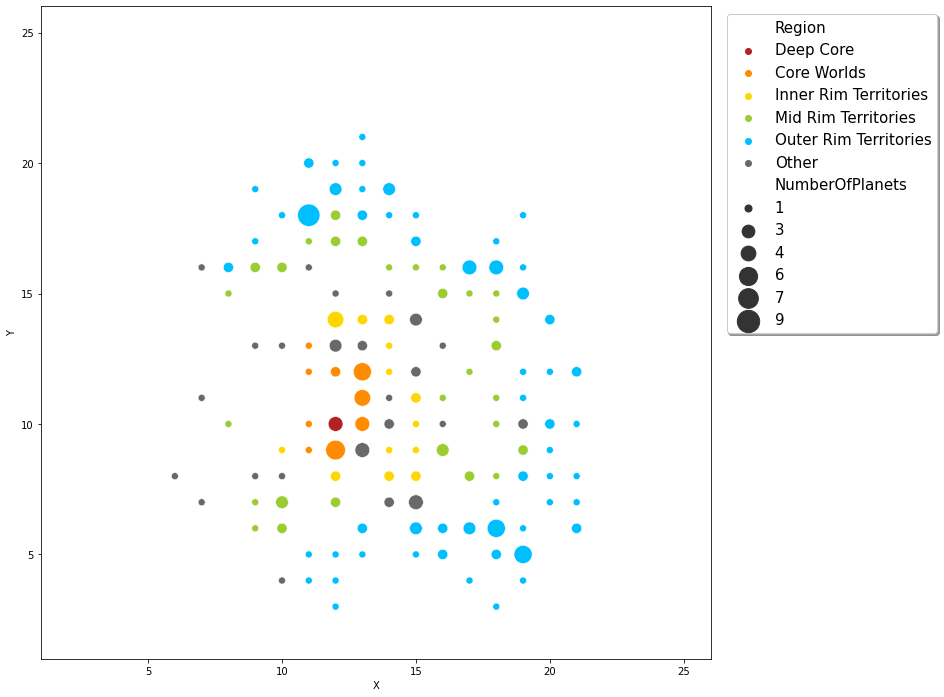

In [18]:
color = {'Deep Core':'firebrick','Core Worlds':'darkorange','Inner Rim Territories':'gold',
         'Mid Rim Territories':'yellowgreen','Outer Rim Territories':'deepskyblue','Other':'dimgray'}

plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=coordinates, x='X', y='Y', size='NumberOfPlanets', hue='Region', hue_order=color.keys(), 
                     palette=color, sizes=(50,500))
ax.legend(fontsize = 15, bbox_to_anchor= (1.35, 1), shadow = True)
ax.set_ylim(1,26)
ax.set_xlim(1,26)
plt.show()

Success!

You are looking at the **Star Wars Galaxy Map**.  
We've managed to map every single planet that had information about it's coordinates. As we can see, there are coordinates (especially in Outer Rim Territories and Core Worlds) containing larger amount of planets.

We have also succesfully mapped desired regions. And they definitely fit their description:
- **Deep Core** is close to the center of the Galaxy
- We can clearly distinguish sectors that are part of the **Core Worlds**, **Inner Rim**, **Mid Rim** and **Outer Rim**
- Those territories do in fact differ from each other in terms of their **distance from the core of the Galaxy**

So far so good! Now let's take a look at planets affiliation.

## 3.2. Affiliation

Following the same steps as before, we will take a closer look at planets affiliation.

Because there are lots of factions that ruled over Star Wars planets, I've decided to show only those which ruled over more than one planet. So let's filter out those less relevant.

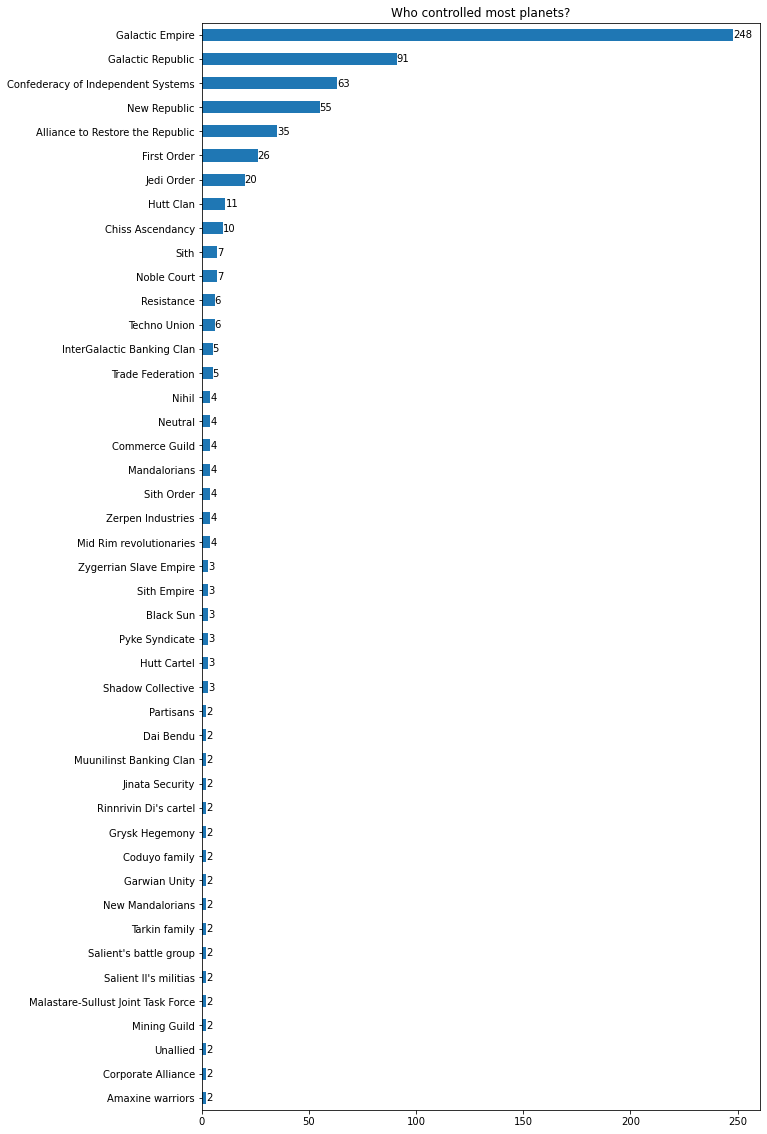

In [19]:
affData = pd.Series(index=sort_by_val(swPlanets,'affiliation')[0], data=sort_by_val(swPlanets,'affiliation')[1]).sort_values()
relevantAffData = affData[affData>1]
ax = relevantAffData.plot(kind='barh', figsize=(10,20))
ax.set_title('Who controlled most planets?')

for i in range(len(relevantAffData.index)):
    ax.text(relevantAffData[i], i, relevantAffData[i], va='center')
plt.show()

As it turns out, the **Galactic Empire** was the biggest of them all. They controlled the largest amount of planets.

The factions that I decided to show on maps are not necessarily the biggest ones though. Since we have 3 main Star Wars trilogies, and in every trilogy we have a conflict between two opposite factions, I want to show those pairs on the maps, and check how big their teritory was.

- <u>First Trilogy (Episode 1-3)</u>:
  - **Galactic Republic** vs **Confederacy of Independent Systems**
- <u>Second Trilogy (Episode 4-6)</u>:
  - **Galactic Empire** vs **Alliance to Restore the Republic (Rebel Alliance)**
- <u>Third Trilogy (Episode 7-9)</u>:
  - **First Order** vs **Resistance**

First I will need to create **6 corresponding dataframes** based on coordinates dataframe, but containing only those rows that include specific factions.

In [20]:
#creating data frames for each chosen faction
republicTeritory = cisTeritory = empireTeritory = rebelTeritory = firstOrderTeritory = resistanceTeritory = coordinates

for i in coordinates.index:
    if 'galactic republic' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        republicTeritory = republicTeritory.drop(i, axis=0)
    if 'confederacy of independent systems' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        cisTeritory = cisTeritory.drop(i, axis=0)
    if 'galactic empire' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        empireTeritory = empireTeritory.drop(i, axis=0)
    if 'alliance to restore the republic' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        rebelTeritory = rebelTeritory.drop(i, axis=0)
    if 'resistance' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        resistanceTeritory = resistanceTeritory.drop(i, axis=0)
    if 'first order' not in [j.lower() for j in coordinates.loc[i]['Affiliation']]:
        firstOrderTeritory = firstOrderTeritory.drop(i, axis=0)

terList = [republicTeritory, cisTeritory, empireTeritory, rebelTeritory, firstOrderTeritory, resistanceTeritory]

Now we can make a loop plotting our factions, including the annotation about overall number of planets within their "rule".

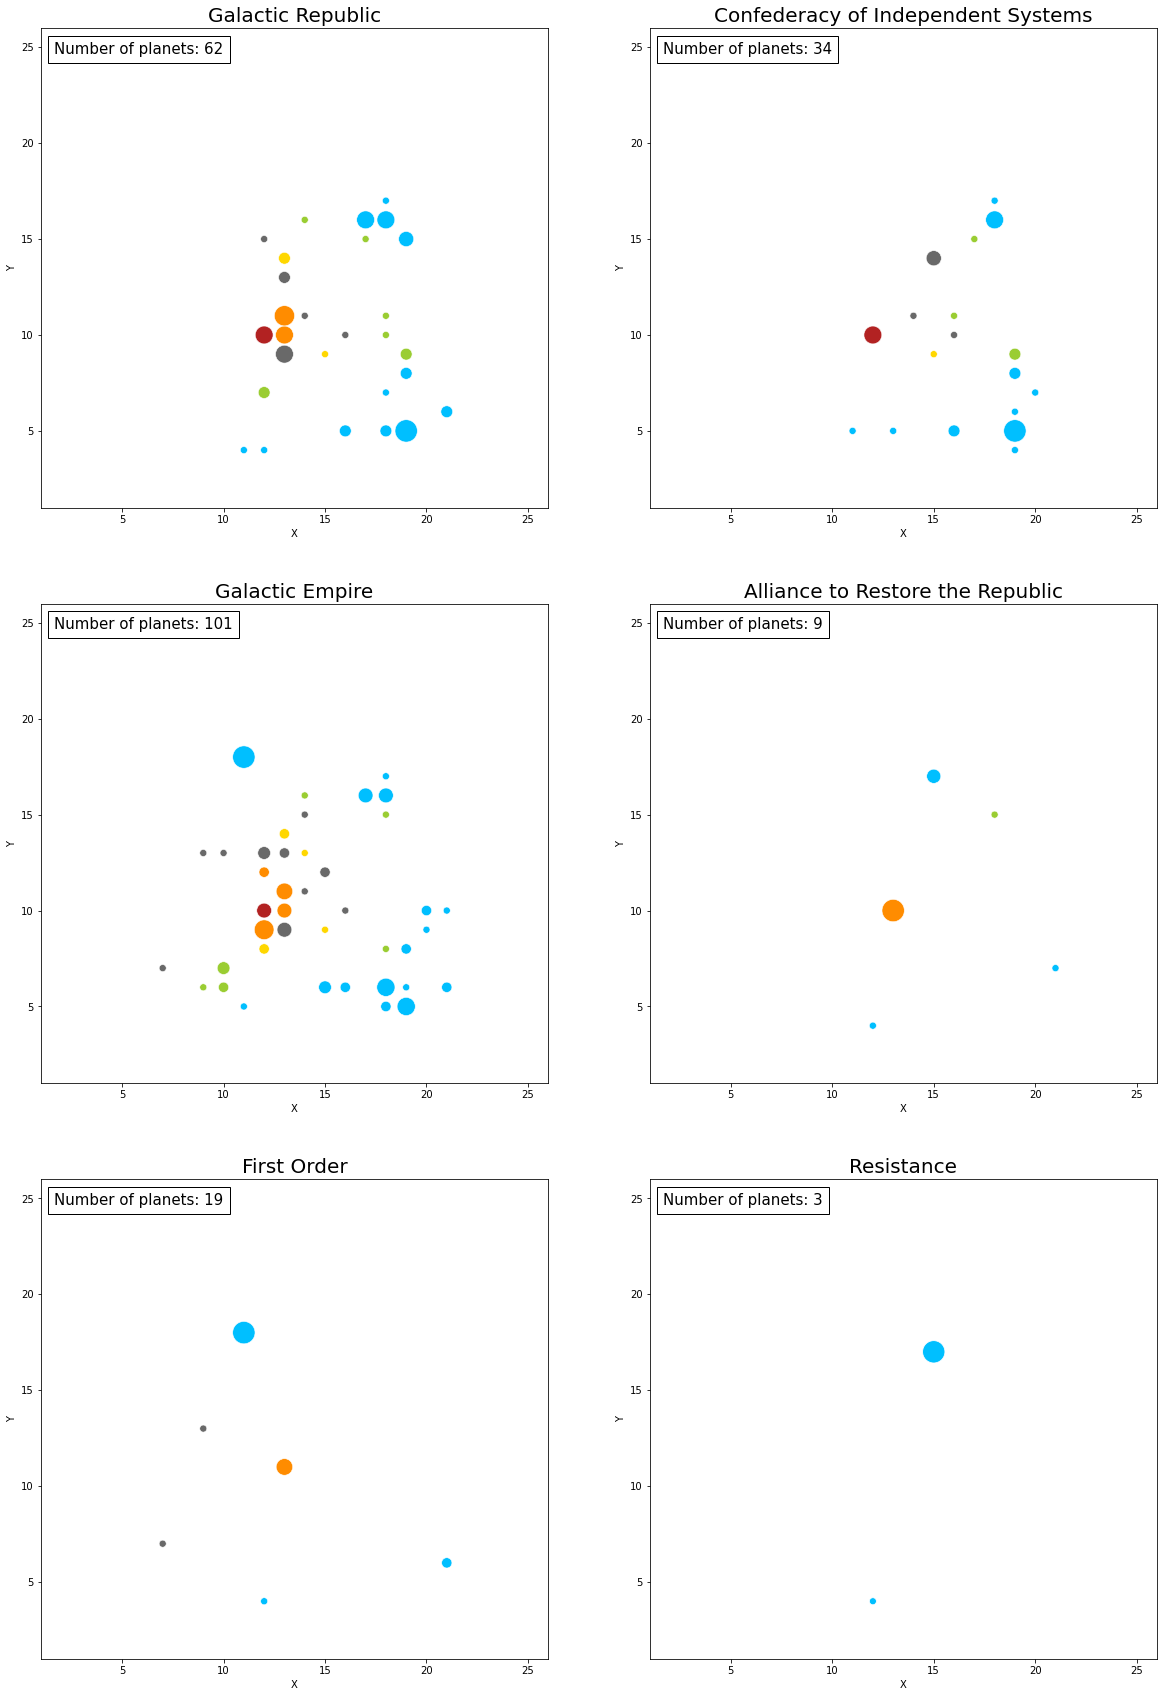

In [21]:
fig, axs = plt.subplots(6, figsize=(20,30))
labels = ['Galactic Republic', 'Confederacy of Independent Systems',
         'Galactic Empire', 'Alliance to Restore the Republic',
         'First Order', 'Resistance']
pos = 1
i = 0

for label, ter in zip(labels,terList):
    axs[i] = plt.subplot(3,2,pos)
    ax = sns.scatterplot(data=ter, x='X', y='Y', size='NumberOfPlanets', hue='Region', 
                         hue_order=color.keys(), palette=color, sizes=(50,500), legend=False)
    ax.set_ylim(1,26)
    ax.set_xlim(1,26)
    ax.set_title(label, size=20)
    ax.add_artist(AnchoredText('Number of planets: {}'.format(ter['NumberOfPlanets'].sum()),loc=2, prop=dict(size=15)))
    pos+=1
    i+=1

plt.show()

Some of the planets can appear multiple times, because throughout the time they changed affiliation. It is the most visible between **Galactic Republic** and **Galactic Empire** (which makes perfect sense - Galactic Republic transformed itself into Galactic Empire). It is also quite noticable between **Galactic Republic** and **Confederacy of Independent Systems** - throughout the war between those two factions (The Clone Wars) some planets changed their affiliation.

The least spectacular territories are **First Order** and **Resistance**. This is very specific situation, because there was actually third party involved as well - **The New Republic**. It remained basically neutral though, unless it was too late (First Order destroyed Star System with New Republic government - Hosnian Prime - paralysing all member planets which didn't help Resistence untill the very last moment). The Resistance was alienated in their fight agains First Order, which was a struggle taking into consideration how few of them there were. It was very similar with the **Rebel Alliance** against the **Empire**. This charts reflects prety well the disproportions between those factions.

## 3.3. Trade routes

Weirdly enough there are trade routes in our Coordinates dataframe which includes only one planet. There are several reasons behind this. First of all we need to remember that Coordinates dataframe is incomplete - it contains only those planets, which have information about coordinates. Secondly - we don't have full information. Sometimes the planet that exist on wiki site was only mentioned once in some book with annotation, that through this system runs certain trade route (which could be mentioned only once as well).

This is why we will plot only routes with two or more planets, to have list of more complete (and relevant) data.

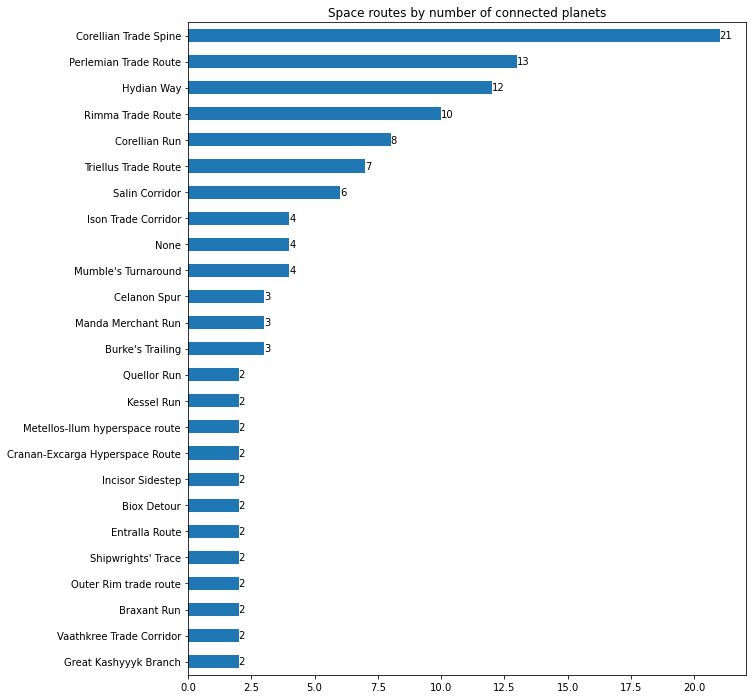

In [22]:
rtData = pd.Series(index=sort_by_val(swPlanets,'routes')[0], data=sort_by_val(swPlanets,'routes')[1]).sort_values()
relevantRtData = rtData[rtData>1]
ax = relevantRtData.plot(kind='barh', figsize=(10,12))
ax.set_title('Space routes by number of connected planets')

for i in range(len(relevantRtData.index)):
    ax.text(relevantRtData[i], i, relevantRtData[i], va='center')
plt.show()

In order to keep thins plain and simple we will focus only on the four biggest trade routes:

In [23]:
rtData.sort_values(ascending=False)[0:4]

Corellian Trade Spine    21
Perlemian Trade Route    13
Hydian Way               12
Rimma Trade Route        10
dtype: int64

In [24]:
#creating dataframes for chosen trade routes
cts = ptr = hw = rtr = coordinates.sort_values('Y')

for i in coordinates.index:
    if 'corellian trade spine' not in [j.lower() for j in coordinates.loc[i]['Routes']]:
        cts = cts.drop(i, axis=0)
    if 'perlemian trade route' not in [j.lower() for j in coordinates.loc[i]['Routes']]:
        ptr = ptr.drop(i, axis=0)
    if 'hydian way' not in [j.lower() for j in coordinates.loc[i]['Routes']]:
        hw = hw.drop(i, axis=0)
    if 'rimma trade route' not in [j.lower() for j in coordinates.loc[i]['Routes']]:
        rtr = rtr.drop(i, axis=0)

This time we will connect our sectors (scatter points) to better visualise trade routes.

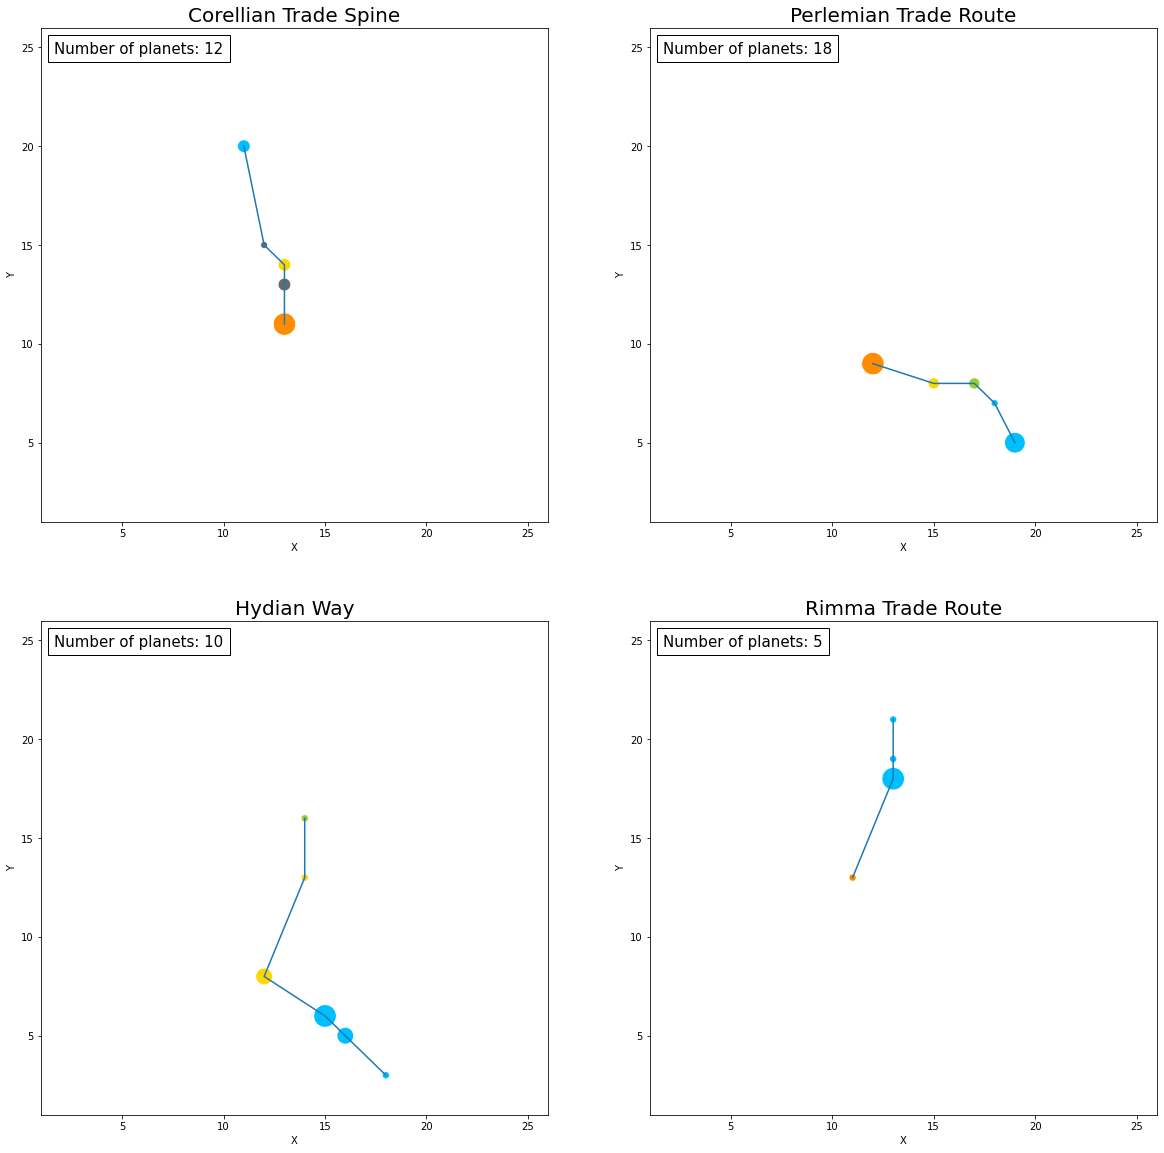

In [25]:
fig, axs = plt.subplots(4, figsize=(20,20))
rtLabels = ['Corellian Trade Spine', 'Perlemian Trade Route', 'Hydian Way', 'Rimma Trade Route']
rtList = [cts,ptr,hw,rtr]
pos = 1
i = 0
for label, rt in zip(rtLabels,rtList):
    axs[i] = plt.subplot(2,2,pos)
    ax = sns.scatterplot(data=rt, x='X', y='Y', size='NumberOfPlanets', hue='Region', 
                         hue_order=color.keys(), palette=color, sizes=(50,500), legend=False)
    ax.set_ylim(1,26)
    ax.set_xlim(1,26)
    ax.set_title(label, size=20)
    ax.add_artist(AnchoredText('Number of planets: {}'.format(rt['NumberOfPlanets'].sum()),loc=2, prop=dict(size=15)))
    plt.plot(rt['X'], rt['Y'])
    pos+=1
    i+=1

plt.show()

Excellent. Looks a bit like star constellations.

The only thing left to do is to move those trade routes to our Galaxy Map.

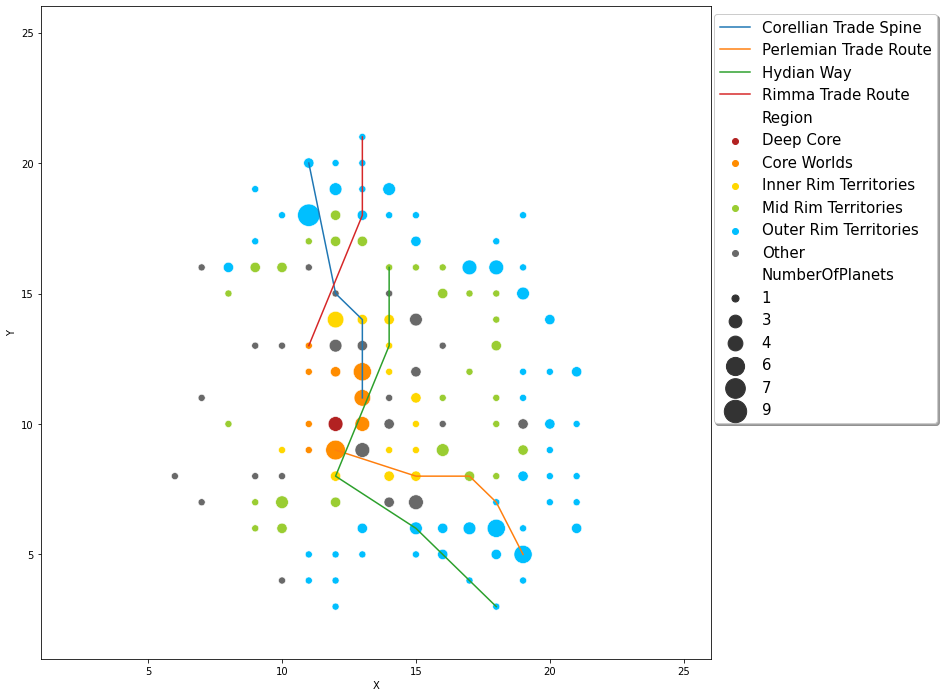

In [26]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=coordinates, x='X', y='Y', size='NumberOfPlanets', hue='Region', hue_order=color.keys(), 
                     palette=color, sizes=(50,500))

for label, rt in zip(rtLabels,rtList):
    plt.plot(rt['X'], rt['Y'], label = label)

ax.legend(fontsize = 15, bbox_to_anchor= (1.35, 1), shadow = True)
ax.set_ylim(1,26)
ax.set_xlim(1,26)
plt.show()

Interesting thing that we can conclude from this map is how significant was to **communicate Outer Rim Territories to the center part of the Galaxy**. Planets from the Outer Rims were often less developed technologically than planets from central parts (Core Worlds, Inner Rim), but on the other side they seemed new, unknown and exotic for them. Maintaining trade connections between those regions were usually mutually beneficial in terms of both goods and technolodgy/knowledge. 

## 4. Summary

As it turned out the data stored in Star Wars Planets data set scraped from wookieepedia site has much greater potential that I initially assumed. It gives us vast possibilities to present information stored in it, including spatial visualisation. For Star Wars fans it can be appealing in terms of possibilities to expand knowledge about beloved universe. For others - it could arouse interest in this topic, seeing how much more there is to this universe besides popular Star Wars movies.

Is this topic fully depleated? I don't think so. The analysis I conducetd in this topic as well as in my <a href="https://github.com/twerhun/DataAnalysis_Planets/blob/master/Planets_Part1.ipynb">Planet Data Analysis</a> shows the potential in Star Wars planets data. Keep also in mind that this universe is not dead - every now and then we get the new content - new planets, new information.

I hope to return to this topic one day, but perhaps looking at it from the entirely different angle.

Until then I will focus on improving my data analysis and visualisation skills further.  
There are so many interesting topics to analyse after all...